## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
#loading libraries + tests
import numpy as np
from scipy.stats import chisquare  # One-way chi square test
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel,  t, ttest_1samp
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt






In [2]:
#Getting data using bash command !

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-12-11 14:23:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-12-11 14:23:25 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [209]:
#reading in csv and declaring dataframe variable, naming columns correctly
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [213]:
df.loc[['water-project']]

KeyError: ignored

In [4]:
#Calling the Sum of all null/NaN values by column and sorting from least to greatest 

df.isnull().sum().sort_values()

#Checking again because I *know* there are missing values
df.isnull().values.any()

False

In [0]:
#using melt to tidy dataset, changing column headers to fall under column 'Issue' + to create the Vote column
#Sorting new formatted df

# formatted_df = pd.melt(df,
#                        ["party"],
#                        var_name="Issue",
#                        value_name="Vote")
# formatted_df.head()

In [49]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

# #Replacing all '?' values with 'Other' to more accurately convey the Values
# formatted_df.replace(to_replace ="?", 
#                  value ="Other")

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#filtering formatted_df into two separate dataframes
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
#checking out my new dataframes
dem.head()
dem.describe()

In [38]:
#checking out my new dataframes
rep.head()
rep.describe()


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Objective 1: 
##Generate and numerically represent a confidence interval

In [0]:

#declaring relevant variables to use with testing


#creating a function that calculates the confidence interval for the observations of congressional voting data
#using t-distribution and two tailed test, default 95% confidence
#returning tuple of (mean, lower bound, upper bound)
 
def confidence_interval(df, confidence=0.95):

  df = np.array(df.dropna())
  mean = np.mean(df)
  n = len(df)
  stderr = stats.sem(df)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)


In [67]:
confidence_interval(dem['immigration'])

(0.4714828897338403, 0.41075744059137587, 0.5322083388763047)

In [63]:
y = np.array(dem['immigration'].dropna())
mean = np.mean(y)
n = len(y)

stderr = stats.sem(y)

interval = stderr * stats.t.ppf((1 + .95) / 2.0, n - 1)

(mean, mean - interval, mean + interval)

(0.4714828897338403, 0.41075744059137587, 0.5322083388763047)

In [28]:
either_or = np.random.binomial(n=1, p=.5, size=50)
either_or

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1])

In [54]:
immigration = dem['immigration'].dropna()

immigration.describe()

count    263.000000
mean       0.471483
std        0.500138
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: immigration, dtype: float64

In [176]:
confidence_interval(dem['immigration'])

(0.4714828897338403, 0.41075744059137587, 0.5322083388763047)

#Objective 2:
##Graphically (with a plot) represent the confidence interval

In [43]:
CI

(nan, nan, nan)

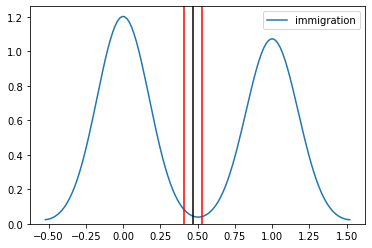

In [65]:
#Visual representation of confidence interval
sns.kdeplot(dem['immigration'].dropna())
CI = confidence_interval(dem['immigration'].dropna())
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

#Objective 3:
##Interpret the confidence interval - what does it tell you about the data and its distribution?

###This Visualization shows us that the majority of Democrats voted in the affirmative of the Education Issue (41% & 53%) majority of the time. Confidence Interval - in this case - is showing us that it is reasonable to assume that in a larger population there would be a 95% chance that these results would also be accurate

#Objective 4: Take 2

In [0]:
# pd.plotting.scatter_matrix(df, alpha=0.2)


In [146]:
formatted_df = pd.melt(df,
                       ["party"],
                       var_name="Issue",
                       value_name="Vote")
formatted_df.head()

,party,Issue,Vote
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,NaN
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


In [199]:
#creating a function to perform 
#calculations on the df 

def process_votes(df):
  cut_points = [0, 2, 4, 6]
  df["Issue"] = pd.cut(df["water-project"],
                                           cut_points)
  return df

data = process_votes(df)
vote_by_party = data[['party', 'water-project']]
vote_by_party.head(24)

,party,water-project
0,republican,1.0
1,republican,1.0
2,democrat,1.0
3,democrat,1.0
4,democrat,1.0
5,democrat,1.0
6,democrat,1.0
7,republican,1.0
8,republican,1.0
9,democrat,1.0


In [162]:
#dropping NaN 
vote_by_party.dropna()

,party,water-project
0,republican,1.0
1,republican,1.0
2,democrat,1.0
3,democrat,1.0
4,democrat,1.0
...,...,...
429,democrat,0.0
430,republican,0.0
431,democrat,0.0
433,republican,0.0


In [200]:
#checking for values of each Y or N vote on issue
vote_by_party['water-project'].value_counts()

1.0    195
0.0    192
Name: water-project, dtype: int64

In [169]:
# Calculating contingency table (totals) with margins
#'n':0, 'y':1
contingency_table = pd.crosstab(
    vote_by_party['party'],
    vote_by_party['water-project'],
    margins = True)

contingency_table

water-project,0.0,1.0,All
party,,,
democrat,119,120,239
republican,73,75,148
All,192,195,387


In [214]:
# Get Row Sums
row_sums = contingency_table.iloc[0:1].values
print(row_sums)

# (2, 2)
# [[119  73]
#  [120  75]]

[[119 120 239]]


In [215]:
# Get Column Sums
col_sums = contingency_table.iloc[0:2].values
print(col_sums)

[[119 120 239]
 [ 73  75 148]]


In [216]:
total = contingency_table.loc['All', 'All']
print("Total number of observations:", total)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
print(np.array(expected))

## Calculating Expected Values for each cell from rows and columns

Total number of observations: 387
[[[ 36.59173127  37.20930233 147.5994832 ]
  [ 22.44702842  23.25581395  91.4005168 ]]]


#Objective 4:

##Chi^2 with Numpy using two categorical variables by hand

In [217]:
#getting contingency table w/o margins

contingency = pd.crosstab(vote_by_party['water-project'], 
                          vote_by_party['party'])
contingency = contingency.values

print(contingency.shape)
print(contingency)


(2, 2)
[[119  73]
 [120  75]]


In [201]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")  

Degrees of Freedom: 5


In [221]:
#The observed table matches contingency table (crosstab) 
#+ I don't know why this isn't working,


observed = pd.crosstab(df['party'], df['water-project']).values
print(observed.shape)
observed

(2, 3)


array([[ 28, 119, 120],
       [ 20,  73,  75]])

In [222]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 296.5767259514469


In [83]:
col_sums

array([435, 435, 435, 435, 435, 435])

In [84]:
row_sums

array([267, 168])

#Objective 5:
##Run Chi^2 Test with previously used dataset on two categorical variables in a single line using Scipy

In [223]:
#Since the above Observed and Expected vallues are the same shape they are easily subtracted and divided 
#Therefore no forloop is necessary, = Array Broadcasting

chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")



Chi-Squared: 296.5767259514469


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)